In [ ]:
# %%

from tool import *


def triangular_pulse(a, b, x):
    return np.where(
        np.logical_and(a <= x, x <= (a + b) / 2),
        2 * (x - a) / (b - a),
        np.where(np.logical_and((a + b) / 2 <= x, x <= b), 2 * (b - x) / (b - a), 0),
    )


def rectangular_pulse(a, b, x):
    return np.where(np.logical_and(a <= x, x <= b), 1, 0)

/usr/local/miniforge3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/miniforge3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


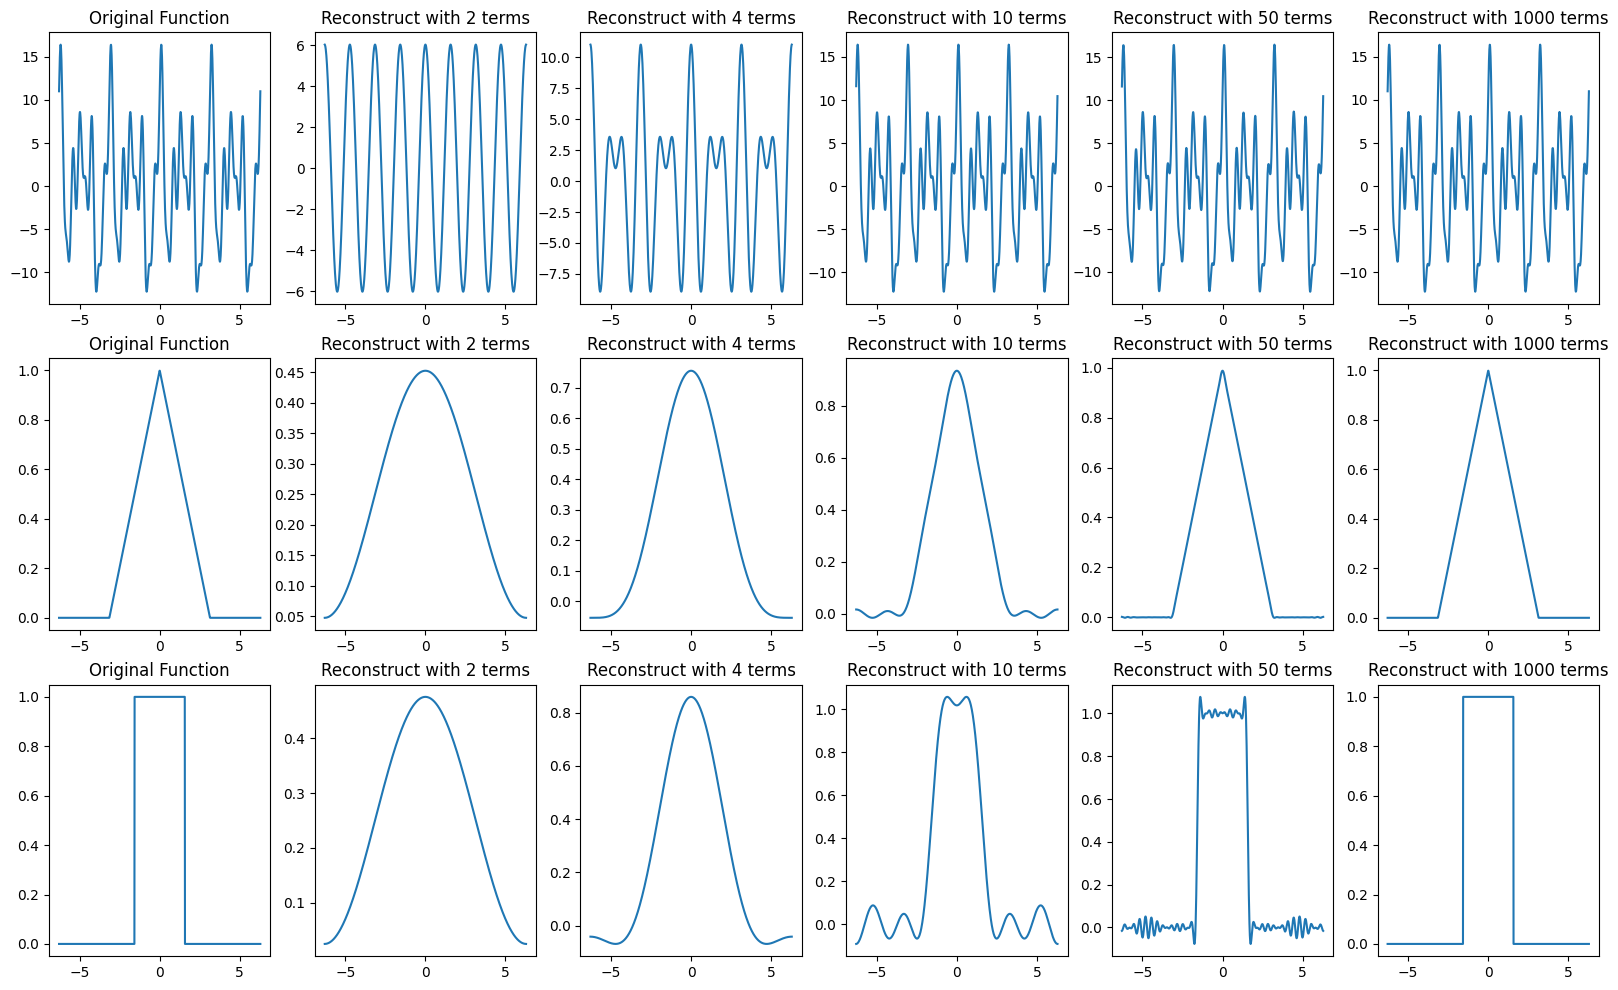

In [ ]:
# %% 第一部分

f = (
    lambda x: 2 * np.sin(2 * x)
    + 6 * np.cos(4 * x)
    + 5 * np.cos(6 * x)
    + 4 * np.sin(10 * x)
    + 3 * np.sin(16 * x)
)

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

func = [
    f(x),
    triangular_pulse(-np.pi, np.pi, x),
    rectangular_pulse(-np.pi / 2, np.pi / 2, x),
]
nth_terms = [2, 4, 10, 50, 1000]

"""
绘制图像：
根据 func 中函数的个数 m，绘制 m 行，每行包含原图像，以及 n 个傅里叶级数的近似图像
"""
fig, axs = plt.subplots(3, 6, figsize=(20, 12))
for i, f in enumerate(func):
    axs[i, 0].plot(x, f)
    axs[i, 0].set_title("Original Function")

    fft_res = np.fft.fft(f)
    for j in range(len(nth_terms)):
        _fft_res = fft_res.copy()
        max_nth_terms = np.argsort(np.abs(_fft_res))[-nth_terms[j] :]
        _fft_res_filtered = np.zeros_like(_fft_res)
        _fft_res_filtered[max_nth_terms] = _fft_res[max_nth_terms]
        recons = np.fft.ifft(_fft_res_filtered)

        # _fft_res[nth_terms[j] :] = 0
        # recons = np.fft.ifft(_fft_res)
        axs[i, j + 1].plot(x, recons)
        axs[i, j + 1].set_title(f"Reconstruct with {nth_terms[j]} terms")

fig.savefig("Out/L3_Fourier_Analysis.png")

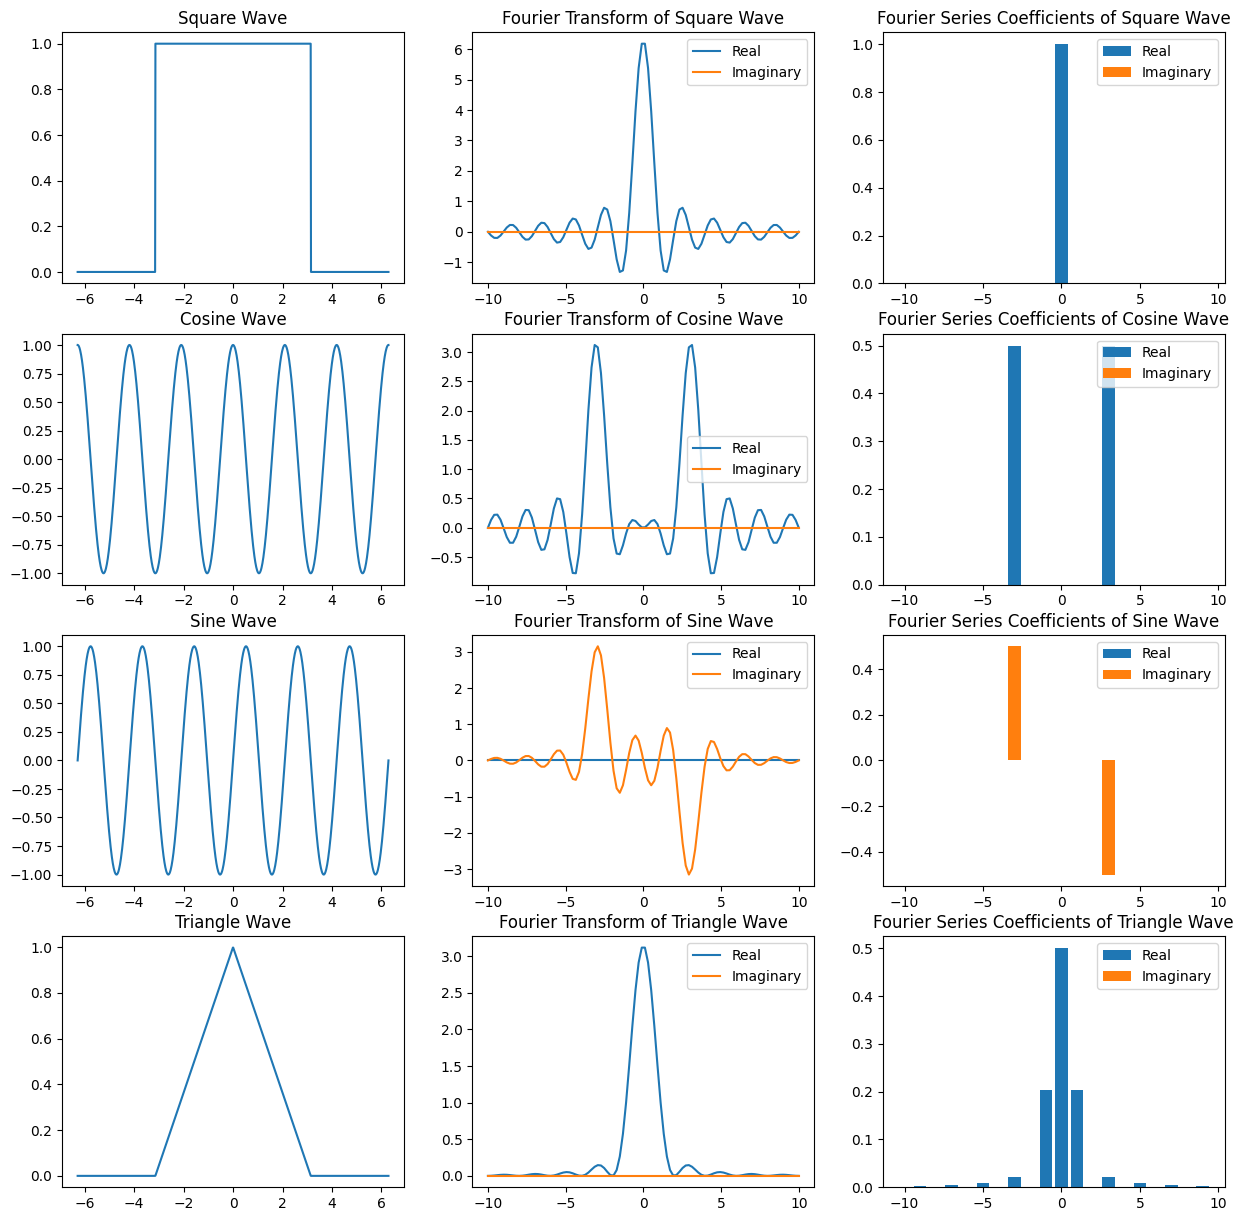

In [ ]:
# %% 第二部分：Fourier Transform 和 Fourier Series

x = sp.symbols("x")
w = sp.symbols("w")


def fourier_transform(f):
    return sp.integrate(f * sp.exp(-sp.I * w * x), (x, -sp.pi, sp.pi)).doit()


def fourier_series_coeff(f, n):
    return sp.integrate(f * sp.exp(-sp.I * n * x), (x, -sp.pi, sp.pi)) / (2 * sp.pi)


funcs = [
    (
        "Square Wave",
        sp.Piecewise(
            (1, (-sp.pi <= x) & (x <= sp.pi)),
            (0, True),
        ),
    ),
    ("Cosine Wave", sp.cos(3 * x)),
    ("Sine Wave", sp.sin(3 * x)),
    (
        "Triangle Wave",
        sp.Piecewise(
            (-sp.Abs(x) / sp.pi + 1, (-sp.pi <= x) & (x <= sp.pi)),
            (0, True),
        ),
    ),
]

t_vals = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
w_vals = np.linspace(-10, 10, 100)
n_vals = np.arange(-10, 10)

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

for i, func in enumerate(funcs):
    func_name, f = func

    # 绘制原图像
    f_vals = np.array([f.subs(x, t).evalf() for t in t_vals])
    ax[i, 0].plot(t_vals, f_vals)
    ax[i, 0].set_title(func_name)

    # 绘制傅里叶变换
    fourier_vals = np.array(
        [fourier_transform(f).subs(w, w_val).evalf() for w_val in w_vals]
    )
    ft_real = np.array([val.as_real_imag()[0] for val in fourier_vals])
    ft_imag = np.array([val.as_real_imag()[1] for val in fourier_vals])
    ax[i, 1].plot(w_vals, ft_real, label="Real")
    ax[i, 1].plot(w_vals, ft_imag, label="Imaginary")
    ax[i, 1].set_title(f"Fourier Transform of {func_name}")
    ax[i, 1].legend()

    # 绘制傅里叶级数
    fourier_series_vals = np.array(
        [fourier_series_coeff(f, n_val).evalf() for n_val in n_vals]
    )
    series_real = np.array([val.as_real_imag()[0] for val in fourier_series_vals])
    series_imag = np.array([val.as_real_imag()[1] for val in fourier_series_vals])
    ax[i, 2].bar(n_vals, series_real, label="Real")
    ax[i, 2].bar(n_vals, series_imag, label="Imaginary")
    ax[i, 2].set_title(f"Fourier Series Coefficients of {func_name}")
    ax[i, 2].legend()

fig.savefig("Out/L3_Fourier_Analysis_2.png")